# TEST AA PRODUCTOS ALIMENTICIOS

## Inspeccion inicial

### Inicializar librerias

In [57]:
import pandas as pd #dataframes
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

### Cargar archivos

In [58]:
df = pd.read_csv("datasets/logs_exp_us.csv", sep='\t')

In [59]:
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


Se identifica que los titulos no estan en un fromato acorde a las buenas practicas ademas de eso no hay valores nulos , se van a verificar los duplicados y se van a cambiar los Dtype de  expID a object , al igual que el de deviceidhash , en cuanto a eventtimestamp se va a pasar a formato de fecha.

## Correciones y limpieza

In [61]:
old_columns = df.columns
new_columns=[]

for column in old_columns:
    lower = column.lower()
    strip =lower.strip()
    new_columns.append(strip)
    
df.columns = new_columns

df.head()

,eventname,deviceidhash,eventtimestamp,expid
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [62]:
df[df.duplicated()].head()

,eventname,deviceidhash,eventtimestamp,expid
453,MainScreenAppear,5613408041324010552,1564474784,248
2350,CartScreenAppear,1694940645335807244,1564609899,248
3573,MainScreenAppear,434103746454591587,1564628377,248
4076,MainScreenAppear,3761373764179762633,1564631266,247
4803,MainScreenAppear,2835328739789306622,1564634641,248


se encuentran 413 duplicados los cuales se van a eliminar.

In [63]:
df_clean =  df.drop_duplicates().reset_index()
df_clean.duplicated().sum()

np.int64(0)

In [64]:
df_clean['eventtimestamp'] = pd.to_datetime(df_clean['eventtimestamp'],unit='s')
df_clean['date'] = df_clean['eventtimestamp'].dt.date
df_clean['hour'] = df_clean['eventtimestamp'].dt.hour

df_clean['date'] = pd.to_datetime(df_clean['date'])


df_clean.head()

,index,eventname,deviceidhash,eventtimestamp,expid,date,hour
0,0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,4
1,1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11
2,2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11
3,3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11
4,4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11


Se encuentra que la unidad original de los datos se da en segundos se procede a hacer el cambio antes de generar las nuevas columnas de fecha y hora.

In [65]:
df_clean['deviceidhash'] = df_clean['deviceidhash'].astype('object')
df_clean['expid'] = df_clean['expid'].astype('object')

In [66]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           243713 non-null  int64         
 1   eventname       243713 non-null  object        
 2   deviceidhash    243713 non-null  object        
 3   eventtimestamp  243713 non-null  datetime64[ns]
 4   expid           243713 non-null  object        
 5   date            243713 non-null  datetime64[ns]
 6   hour            243713 non-null  int32         
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 12.1+ MB


## Estudiar y comprobar los datos

### ¿Cuántos eventos hay en los registros?

In [67]:
print(f" El número total de eventos registrados es de :{df_clean['eventname'].count().round(2)}")

 El número total de eventos registrados es de :243713


### ¿Cuántos usuarios hay en los registros?


In [68]:
print(f" El número de usuarios registrados es de :{df_clean['deviceidhash'].nunique()}")

 El número de usuarios registrados es de :7551


### ¿Cuál es el promedio de eventos por usuario?


In [69]:
eventos_usuario = df_clean.groupby('deviceidhash').agg({'eventname':'count'})
eventos_usuario.columns=['cantidad_eventos_por_usuario']

print (f"En promedio un usuario realiza :{eventos_usuario['cantidad_eventos_por_usuario'].mean().round(0)} eventos")

En promedio un usuario realiza :32.0 eventos


### ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. 

In [70]:
print(f" La fecha inicial es el :{df_clean['date'].min()}")
print(f" La fecha final es el :{df_clean['date'].max()}")
print(f" El tiempo de la prueba en dias es de  :{df_clean['date'].max()-df_clean['date'].min()}")


 La fecha inicial es el :2019-07-25 00:00:00
 La fecha final es el :2019-08-07 00:00:00
 El tiempo de la prueba en dias es de  :13 days 00:00:00


### Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo

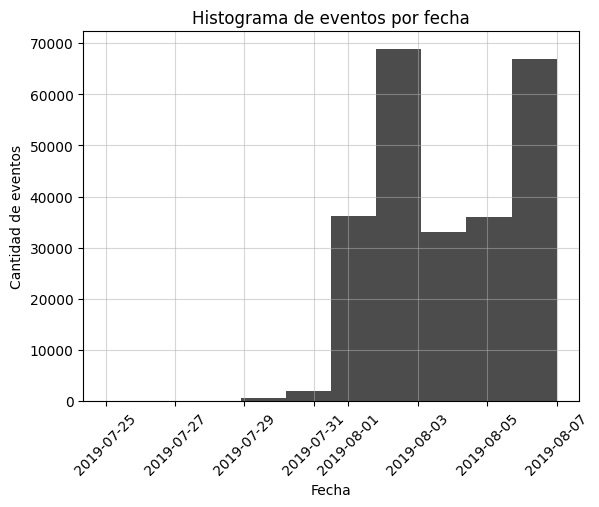

In [71]:
plt.hist(df_clean['date'], bins=10, color='black', alpha=0.7)
plt.title('Histograma de eventos por fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de eventos')
plt.xticks(rotation=45)
plt.grid(True , alpha=0.5)
plt.show()


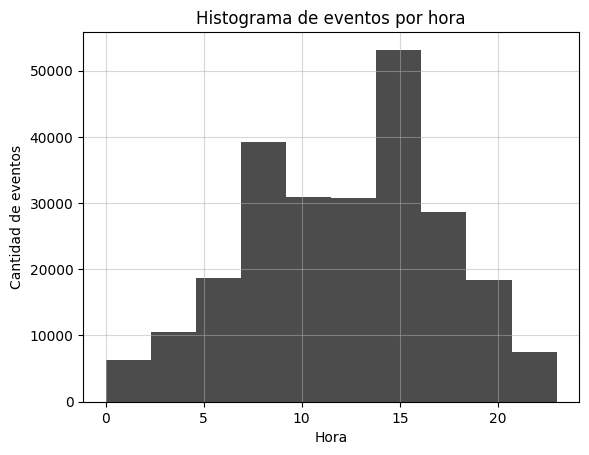

In [72]:
plt.hist(df_clean['hour'], bins=10, color='black', alpha=0.7)
plt.grid(True , alpha=0.5)
plt.title('Histograma de eventos por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de eventos')
plt.show()

Se encuentra que los periodos comprendidos hasta el 31 de julio del 2019 no son lo suficientemente representativos y podrian generar desviaciones mas que todo al momento de promediar datos por día por lo cual a partir de este punto se van a despreciar. En cuanto a la distribucion de las horas es normal dado que comprende los periodos en los cuales la mayoría de las personas se encuentran despiertas.

In [73]:

fecha_vacia = pd.to_datetime("2019-07-31")
df_cleanf = df_clean[df_clean['date']> fecha_vacia]
df_cleanf.head(5)


,index,eventname,deviceidhash,eventtimestamp,expid,date,hour
2826,2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01,0
2827,2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01,0
2828,2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01,0
2829,2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01,0
2830,2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01,0


Se filtra dejando en la tabla las fechas representativas posteriores a lo encontrado en el histograma.

###  ¿Qué periodo representan realmente los datos?

In [74]:
print(f" La fecha inicial es el :{df_cleanf['date'].min()}")
print(f" La fecha final es el :{df_cleanf['date'].max()}")
print(f" El tiempo de la prueba en dias es de  :{df_cleanf['date'].max()-df_cleanf['date'].min()}")

 La fecha inicial es el :2019-08-01 00:00:00
 La fecha final es el :2019-08-07 00:00:00
 El tiempo de la prueba en dias es de  :6 days 00:00:00


Se redujeron 7 días que no eran realmente representativos y si podrian generar errores en el analisis.

### ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [75]:
print(f" El número total de eventos registrados sin filtrar es de :{df_clean['eventname'].count().round(2)}")
print(f" El número total de eventos registrados ya filtrados es de :{df_cleanf['eventname'].count().round(2)}")
print(f" En total se perdieron un total de {df_clean['eventname'].count().round(2)-df_cleanf['eventname'].count().round(2)} eventos")
print(f" Osea el :{(-(df_cleanf['eventname'].count().round(2)/df_clean['eventname'].count().round(2)-1)*100).round(2)}  % de los eventos fueron descartados")

 El número total de eventos registrados sin filtrar es de :243713
 El número total de eventos registrados ya filtrados es de :240887
 En total se perdieron un total de 2826 eventos
 Osea el :1.16  % de los eventos fueron descartados


In [76]:
print(f" El número total de usuarios registrados sin filtrar es de :{df_clean['deviceidhash'].nunique()}")
print(f" El número total de usuarios registrados ya filtrados es de :{df_cleanf['deviceidhash'].nunique()}")
print(f" En total se perdieron un total de {df_clean['deviceidhash'].nunique()-df_cleanf['deviceidhash'].nunique()} usuarios")
print(f" Osea el :{(-(df_cleanf['deviceidhash'].nunique()/df_clean['deviceidhash'].nunique()-1)*100)}  % de los usuarios fueron descartados")

 El número total de usuarios registrados sin filtrar es de :7551
 El número total de usuarios registrados ya filtrados es de :7534
 En total se perdieron un total de 17 usuarios
 Osea el :0.22513574361011646  % de los usuarios fueron descartados


### Asegúrate de tener usuarios de los tres grupos experimentales.

In [77]:
df_cleanf['expid'].unique() 

array([246, 247, 248], dtype=object)

Efectivamente siguen los tres grupos con el dataframe ya filtrado.

## Estudiar el embudo de eventos

### Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [78]:
df_cleanf.head(5)

,index,eventname,deviceidhash,eventtimestamp,expid,date,hour
2826,2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01,0
2827,2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01,0
2828,2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01,0
2829,2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01,0
2830,2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01,0


In [79]:
eventos_frecuencia2 = df_cleanf.groupby('eventname')['eventname'].count()
eventos_frecuencia2.sort_values(ascending=False)


eventname
MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: eventname, dtype: int64

### Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.

In [80]:
eventos_frecuencia = df_cleanf.groupby('eventname').agg({'deviceidhash':'count'}).reset_index()
eventos_frecuencia.columns=['eventname','frecuencia']
eventos_frecuencia = eventos_frecuencia.sort_values('frecuencia',ascending=False)
eventos_frecuencia

,eventname,frecuencia
1,MainScreenAppear,117328
2,OffersScreenAppear,46333
0,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


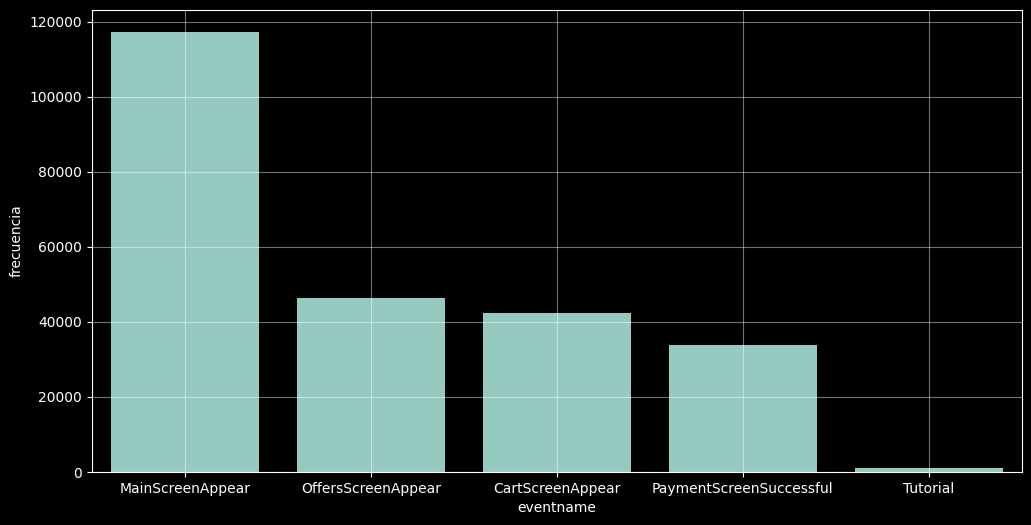

In [111]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))
sns.barplot(x='eventname',y='frecuencia',data=eventos_frecuencia)
plt.grid(True,alpha=0.45)

### ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

In [82]:
sucesos = eventos_frecuencia['eventname']
sucesos.columns=['orden','eventname']

Este es el orden de los sucesos :
- 1 MainScreenAppear 
- 2 OffersScreenAppear 
- 3 CartScreenAppear 
- 4 PaymentScreenSuccessful
- 5 Tutorial

Son una sola secuencia lo cual aún no puedo determinar es la funcion de tutorial puede que sea como preparar los productos , pero el resto tiene orden logico.

### Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.

In [83]:
eventos_frecuencia

,eventname,frecuencia
1,MainScreenAppear,117328
2,OffersScreenAppear,46333
0,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


In [112]:
max_frecuencia = eventos_frecuencia['frecuencia'].max()
eventos_frecuencia['conversion'] = ((eventos_frecuencia['frecuencia'] / max_frecuencia)*100).round(2).astype(str) + '%'
eventos_frecuencia

,eventname,frecuencia,conversion,conversion_siguiente_etapa
1,MainScreenAppear,117328,100.0%,39.49%
2,OffersScreenAppear,46333,39.49%,91.30%
0,CartScreenAppear,42303,36.06%,80.18%
3,PaymentScreenSuccessful,33918,28.91%,2.96%
4,Tutorial,1005,0.86%,N/A


In [113]:
conversion_siguiente = []
for i in range(len(eventos_frecuencia) - 1):
    frecuencia_actual = eventos_frecuencia['frecuencia'].iloc[i]
    frecuencia_siguiente = eventos_frecuencia['frecuencia'].iloc[i+1]
    if frecuencia_actual > 0:
        conversion = (frecuencia_siguiente / frecuencia_actual) * 100
        conversion_siguiente.append(f'{conversion:.2f}%')
    else:
        conversion_siguiente.append('0.00%') 

conversion_siguiente.append('N/A')

eventos_frecuencia['conversion_siguiente_etapa'] = conversion_siguiente
eventos_frecuencia

,eventname,frecuencia,conversion,conversion_siguiente_etapa
1,MainScreenAppear,117328,100.0%,39.49%
2,OffersScreenAppear,46333,39.49%,91.30%
0,CartScreenAppear,42303,36.06%,80.18%
3,PaymentScreenSuccessful,33918,28.91%,2.96%
4,Tutorial,1005,0.86%,N/A


Se identifica que la cantidad de clientes que pasan de la etapa 1 a la etapa 2 es de tan solo el 39.49% , en cambio una vez el cleinte ve los descuentos procede a agregar cosas al carrito en un 91.3%  y de este 91% pasan a la etapa mas importante que es la del pago un total del 80.12% lo cual es un rate muy alto , se encuentra que una vez el cliente ve los descuentos lo mas probable es que realice una compra por lo cual se recomienda que sean mas visibles el tema de las ofertas en el banner principal, o si hay la posibilidad que los clientes entren directamente a los descuentos , por ultimo se descarta del analisis los clientes que van a ver el tutorial ya que esto no es realmente valioso.

### ¿En qué etapa pierdes más usuarios?

numericamente en la ultima etapa entre el evento 3 y 4 ya que pierdo alrededor del 97% de los usuarios pero se descarta esto ya que no tiene valor de los datos representativos , la perdida realmente importante se da entre la etapa 1 y la etapa 2 , con un 61% de perdidas de clientes aporximadamente.

### ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

In [86]:
pago =  eventos_frecuencia['frecuencia'][eventos_frecuencia['eventname']=='PaymentScreenSuccessful']

In [87]:
print(((pago/eventos_frecuencia['frecuencia'].max())*100).round(2))

3    28.91
Name: frecuencia, dtype: float64


Solo el 28.91% de nuestros clientes realizan todo el proceso.

## Estudiar los resultados del experimento 

### ¿Cuántos usuarios hay en cada grupo?

In [119]:
user_group = df_cleanf.groupby('expid').agg({'deviceidhash':'nunique'}).reset_index()
user_group

,expid,deviceidhash
0,246,2484
1,247,2513
2,248,2537


hacer A/A sobre 246 y 247 que son los grupos d econtrol, puede o no haber una dif significativa , si no la hay uso alguno para hacer A/B para el 248 y alguno de los dos anteriores.

/tmp/ipykernel_31224/2412661839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_group['expid'], y=user_group['deviceidhash'], palette='viridis')


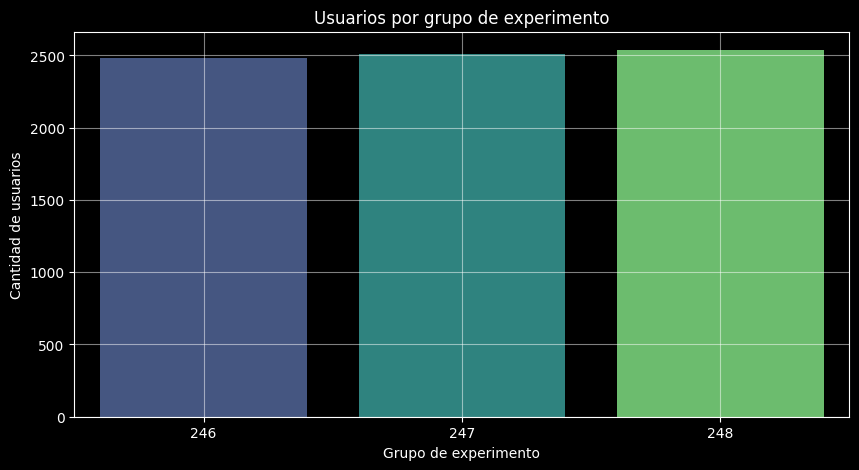

In [122]:
plt.figure(figsize=(10,5))
sns.barplot(x=user_group['expid'], y=user_group['deviceidhash'], palette='viridis')
plt.title('Usuarios por grupo de experimento')
plt.xlabel('Grupo de experimento')
plt.ylabel('Cantidad de usuarios')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.5)
plt.show()

Tienen cantidades bastante similares.

### Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.


In [90]:
visitantes_en_ambos = df_cleanf.groupby('deviceidhash').agg({'expid':'nunique'})
visitantes_en_ambos = visitantes_en_ambos[visitantes_en_ambos['expid']>1]
visitantes_en_ambos = visitantes_en_ambos.index
visitantes_en_ambos


Index([], dtype='int64', name='deviceidhash')

In [91]:
muestra_7_6 = df_cleanf[(df_cleanf['expid']==247)|(df_cleanf['expid']==246)]
muestra_7_6.sample(5)

,index,eventname,deviceidhash,eventtimestamp,expid,date,hour
100795,100985,MainScreenAppear,2157460938665527156,2019-08-03 16:55:04,247,2019-08-03,16
185102,185435,MainScreenAppear,252498997408806928,2019-08-06 08:15:02,246,2019-08-06,8
46868,46976,MainScreenAppear,2981526417578151601,2019-08-02 08:02:24,246,2019-08-02,8
172943,173260,MainScreenAppear,1396226661259207902,2019-08-05 18:58:47,247,2019-08-05,18
152291,152577,CartScreenAppear,733563556336010524,2019-08-05 10:29:16,246,2019-08-05,10


In [92]:
muestra_7_6.loc[muestra_7_6['eventname'] == 'PaymentScreenSuccessful', 'compra'] = 1
muestra_7_6.loc[muestra_7_6['eventname'] != 'PaymentScreenSuccessful', 'compra'] = 0

/tmp/ipykernel_31224/526529943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra_7_6.loc[muestra_7_6['eventname'] == 'PaymentScreenSuccessful', 'compra'] = 1


Ya tenemos el total de personas que hay en cada grupo vamos a ver cuantas de ellas llegaron hasta el evento de payment succesfull esa va a ser nuestra metrica el rate de compra.

In [93]:
compradores_ = muestra_7_6.groupby('expid').agg({'compra':'sum','index':'count'}).reset_index()
compradores_.columns=['expid','cant_compradores','cant_inicio']
compradores_['rate %'] = ((compradores_['cant_compradores'] / compradores_['cant_inicio'])*100).round(2)
compradores_

,expid,cant_compradores,cant_inicio,rate %
0,246,11852.0,79302,14.95
1,247,9981.0,77022,12.96


Establecimos y calculamos el KPI o metrica que consideramos relevante. Encontramos que es mayor el rate usando la prueba 246

In [94]:
comprador_246 = muestra_7_6[muestra_7_6['expid']==246]
comprador_246 =  comprador_246['compra']

comprador_247 = muestra_7_6[muestra_7_6['expid']==247]
comprador_247 =  comprador_247['compra']

In [95]:
print("{0:.5f}".format(st.mannwhitneyu(comprador_246, comprador_247)[1]),"valor p")
print("{0:.3f}".format(comprador_246.mean()/comprador_247.mean()-1),"diferencia relativa")

0.00000 valor p
0.153 diferencia relativa


El valor p es considerablemente inferior con un 0 a 0.05 por lo que rechazamos la hipótesis nula, no hay diferencias entre los tamaños de las muestras. El análisis de datos sin procesar mostró que las tasas de conversión de los grupos tienen diferencias estadísticamente significativas. La ganancia de conversión relativa del grupo 246 en comparación con el grupo 247 es del 15%.

### Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

In [96]:
most_popular = muestra_7_6.groupby(['expid','eventname'])['deviceidhash'].nunique()
most_popular

expid  eventname              
246    CartScreenAppear           1266
       MainScreenAppear           2450
       OffersScreenAppear         1542
       PaymentScreenSuccessful    1200
       Tutorial                    278
247    CartScreenAppear           1238
       MainScreenAppear           2476
       OffersScreenAppear         1520
       PaymentScreenSuccessful    1158
       Tutorial                    283
Name: deviceidhash, dtype: int64

In [97]:
def encontrar_evento(df, nombre_evento):
    conteo = df[df['eventname'] == nombre_evento].groupby('expid')['deviceidhash'].nunique()
    total_usuarios = df.groupby('expid')['deviceidhash'].nunique()
    ratio_evento = conteo / total_usuarios

    resultados = pd.DataFrame({
        'expid': conteo.index,
        'cantidad': conteo.values,
        'total_usuarios': total_usuarios.loc[conteo.index].values,
        'proporcion': ratio_evento.values
    })

    print(f"\nAnálisis del evento: {nombre_evento}")
    print(resultados)

    
    usuario_grupo246 = conteo.get(246)
    usuario_grupo247 = conteo.get(247)

    if usuario_grupo246 is not None and usuario_grupo247 is not None:
        
        statistic, p_value = st.mannwhitneyu(usuario_grupo246, usuario_grupo247)
        print(f"{p_value:.5f} valor p")

        proporcion_grupo246 = ratio_evento.get(246)
        proporcion_grupo247 = ratio_evento.get(247)

        if proporcion_grupo246 is not None and proporcion_grupo247 is not None:
            if proporcion_grupo247 != 0:
                diferencia_relativa = (proporcion_grupo246 - proporcion_grupo247) / proporcion_grupo247
                print(f"{diferencia_relativa:.3f} diferencia relativa")

        
eventos_unicos = muestra_7_6['eventname'].unique()
for evento in eventos_unicos:
    encontrar_evento(muestra_7_6, evento)


Análisis del evento: Tutorial
   expid  cantidad  total_usuarios  proporcion
0    246       278            2484    0.111916
1    247       283            2513    0.112614
1.00000 valor p
-0.006 diferencia relativa

Análisis del evento: MainScreenAppear
   expid  cantidad  total_usuarios  proporcion
0    246      2450            2484    0.986312
1    247      2476            2513    0.985277
1.00000 valor p
0.001 diferencia relativa

Análisis del evento: OffersScreenAppear
   expid  cantidad  total_usuarios  proporcion
0    246      1542            2484    0.620773
1    247      1520            2513    0.604855
1.00000 valor p
0.026 diferencia relativa

Análisis del evento: PaymentScreenSuccessful
   expid  cantidad  total_usuarios  proporcion
0    246      1200            2484    0.483092
1    247      1158            2513    0.460804
1.00000 valor p
0.048 diferencia relativa

Análisis del evento: CartScreenAppear
   expid  cantidad  total_usuarios  proporcion
0    246      1266      

Podemos confirmar que la division de los grupos es correcta la diferencia relativa mayor es tan solo del 4.8%.

### Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

Vamos a realizar el primero entre el grupo 246 de control y el 248 que es el de prueba. Esta vez si deberia haber diferencia para el 248

In [98]:
eventos_unicos = df_cleanf['eventname'].unique()
for evento in eventos_unicos:
    encontrar_evento(df_cleanf, evento)


Análisis del evento: Tutorial
   expid  cantidad  total_usuarios  proporcion
0    246       278            2484    0.111916
1    247       283            2513    0.112614
2    248       279            2537    0.109972
1.00000 valor p
-0.006 diferencia relativa

Análisis del evento: MainScreenAppear
   expid  cantidad  total_usuarios  proporcion
0    246      2450            2484    0.986312
1    247      2476            2513    0.985277
2    248      2493            2537    0.982657
1.00000 valor p
0.001 diferencia relativa

Análisis del evento: OffersScreenAppear
   expid  cantidad  total_usuarios  proporcion
0    246      1542            2484    0.620773
1    247      1520            2513    0.604855
2    248      1531            2537    0.603469
1.00000 valor p
0.026 diferencia relativa

Análisis del evento: CartScreenAppear
   expid  cantidad  total_usuarios  proporcion
0    246      1266            2484    0.509662
1    247      1238            2513    0.492638
2    248      1230

Encontramos que la diferencia tampoco es significativa por lo cual el cambio que se le realizo al grupo de prueba 248 no es realmente significativo. Dado que en comparacion la diferencia relativa aumenta pero muy poco .

### ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

El niver de significancia lo estableci en el 5% y en todas las pruebas que realizamos el valor de p es mayor por lo tanto establecemos que no hay diferecnia significativa entre los grupos relacionados . Estableciendo los analizado se confirma el valor de significancia impuesto para el analisis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. LAs conclusiones son correctas. Se ha interpretado correctamente el resultado de los p valores obtenidos en las pruebas A/B.
    

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola!
    
Te quiero felicitar por tu proyecto, está bastante completo y bien realizado. Me gustó particularmente como se realizaron de manera iterativa las pruebas para comparar los dos grupos, muy bien. Puedo aprobar tu proyecto, éxito en los siguientes sprints.
    
Saludos, Marcos
</div>